In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [3]:
data_path = os.path.join("data", "wine_dataset")

with open(os.path.join(data_path, "wineQualityInfo.txt"), "r") as f:
    print(f.read())

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [4]:
df = pd.read_csv(os.path.join(data_path, "wineQualityWhites.csv"), sep=",")
df.columns = [col.replace(".", "_") for col in df.columns]
df = df[df.columns[1:]]
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Univariate Analysis

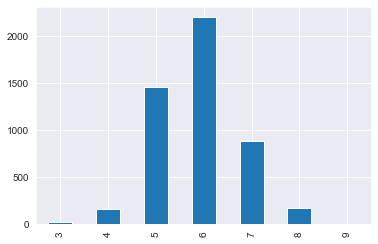

In [7]:
quality_count = df["quality"].value_counts().sort_index()
quality_count.plot(kind="bar");

In [8]:
bins = [0, 5.5, 6.5, 100]
labels = ["Below Average", "Average", "Above Average"]

df["quality_factor"] = pd.cut(df["quality"], bins=bins, labels=labels)

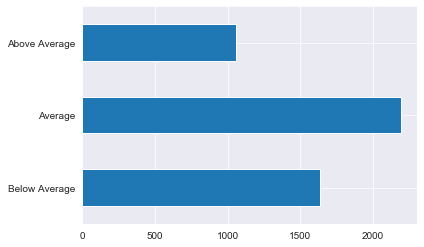

In [10]:
quality_count = df["quality_factor"].value_counts().sort_index()
quality_count.plot(kind="barh");

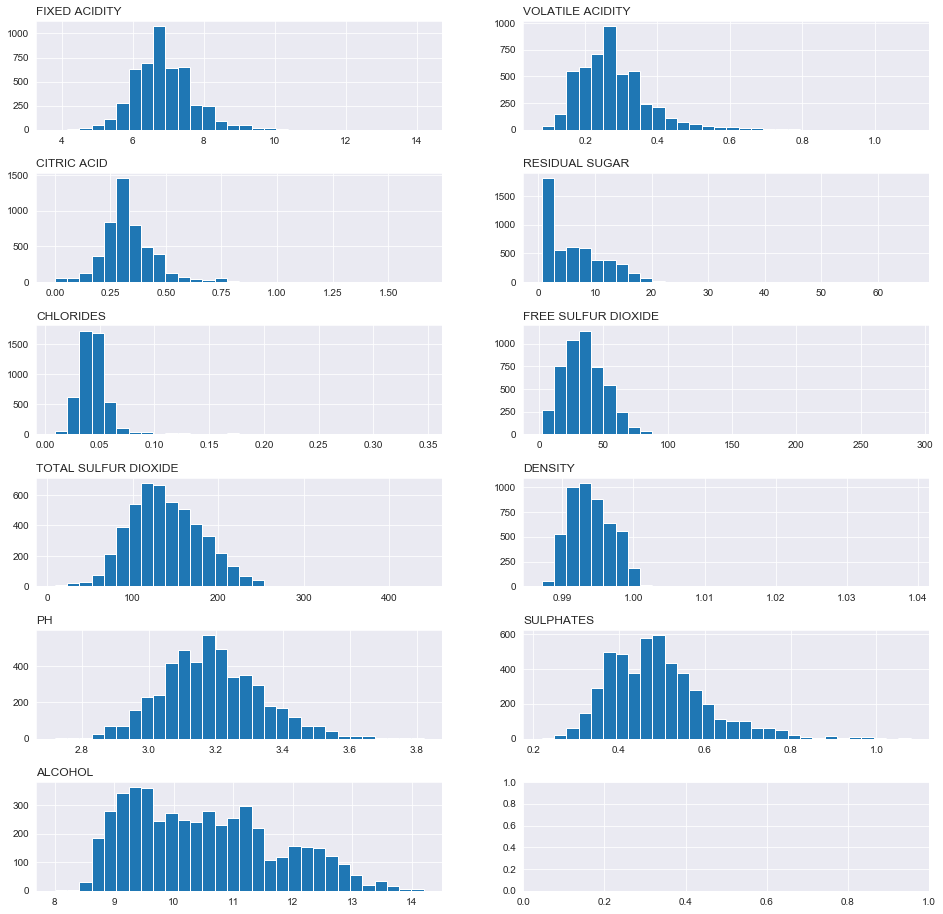

In [17]:
fig, axs = plt.subplots(6, 2, figsize=(16, 16), gridspec_kw={"hspace": .4})

for i in np.arange(len(df.columns[:11])):
    axi = axs.flat[i]
    column = df.columns[i]
    axi.hist(df[column], bins=30)
    axi.set_title(column.replace("_", " ").title().upper(), loc="left")

#### Notes
- As colunas, com exceção do pH, são enviesadas para a direita.
- Residual Sugar tem uma alta kurtosis e Alcohol parece ter várias distribuições.

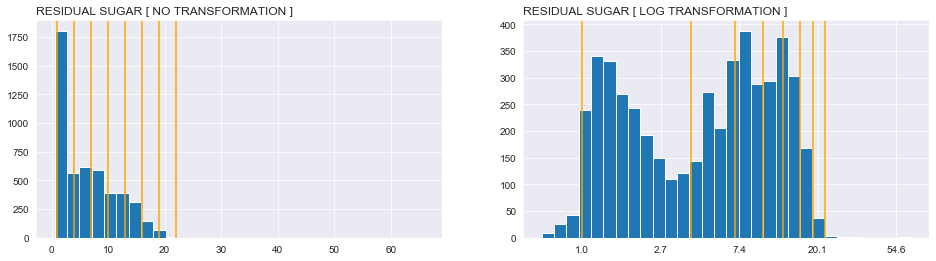

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.hist(df["residual_sugar"], bins=30)
ax1.set_title("Residual Sugar [ No Transformation ]".upper(), loc="left")

log_residual = np.log(df["residual_sugar"])
ax2.hist(log_residual, bins=30)
ax2.set_xticklabels([np.round(np.exp(x), 1) for x in ax2.get_xticks()])
ax2.set_title("Residual Sugar [ Log Transformation ]".upper(), loc="left")

for x in np.arange(1, 25, 3):
    ax1.axvline(x, color="orange", alpha=1)
    ax2.axvline(np.log(x), color="orange", alpha=1);